In [32]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from astropy import units as u
from astropy import constants as const


from matplotlib import rc                                                                                                                                                                                                                    
from matplotlib import rcParams
rc('font', family='serif', weight = 'bold')
rc('text', usetex=True)
matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']
rc('axes', linewidth=2)

matplotlib.rcParams['xtick.major.size'] = 12
matplotlib.rcParams['ytick.major.size'] = 12
matplotlib.rcParams['xtick.minor.size'] = 8
matplotlib.rcParams['ytick.minor.size'] = 8
matplotlib.rcParams['font.weight']= 'bold'
# matplotlib.rcParams.update({'font.weight': 'bold'})
from matplotlib.ticker import (FormatStrFormatter,
                               AutoMinorLocator)

fs = 24 # fontsize for plots
rc('axes', linewidth=2)



from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


%matplotlib inline
import pesummary
from pesummary.io import read
print(pesummary.__version__)
import h5py
# %config InlineBackend.figure_format = 'retina'

import astropy.cosmology
from astropy import units
from astropy import constants as c
from astropy import units as u
import pycbc.conversions
import numpy
import h5py as h5

import pandas as pd



%matplotlib inline
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

0.9.1


In [30]:

BBHsGWTC1 = ['GW150914', 'GW151012', 'GW151226', 'GW170104', 'GW170608', 'GW170729',  'GW170809', 'GW170814', 'GW170818', 'GW170823']
BBHsGWTC2 = ['GW190408_181802','GW190412','GW190413_052954','GW190413_134308','GW190421_213856',\
'GW190424_180648','GW190503_185404','GW190512_180714',\
'GW190513_205428','GW190514_065416','GW190517_055101','GW190519_153544','GW190521_074359',\
'GW190521','GW190527_092055','GW190602_175927','GW190620_030421','GW190630_185205','GW190701_203306',\
'GW190706_222641','GW190707_093326','GW190708_232457','GW190720_000836',\
'GW190727_060333','GW190728_064510','GW190731_140936','GW190803_022701','GW190828_063405',\
'GW190828_065509','GW190910_112807','GW190915_235702','GW190924_021846','GW190929_012149',\
 'GW190930_133541']

BHNSGWTC2 = ['GW190425', 'GW190814', 'GW190426_152155']
BNSGWTC1 = ['GW170817']
BNSGWTC2 = ['GW190425']

In [18]:



def layoutAxes(ax, nameX='', nameY='', \
               labelSizeMajor = 10, fontsize = 25, second=False, labelpad=None, setMinor=True):
    """
    Tiny code to do the layout for axes in matplotlib
    """
    tickLengthMajor = 10
    tickLengthMinor = 5
    tickWidthMajor  = 1.5
    tickWidthMinor  = 1.5
    
    #rc('axes', linewidth=2)
    #label1 always refers to first axis not the twin 
    if not second:
        for tick in ax.xaxis.get_major_ticks():
            tick.label1.set_fontsize(fontsize)
            #tick.label1.set_fontweight('bold')
        for tick in ax.yaxis.get_major_ticks():
            tick.label1.set_fontsize(fontsize)
            #tick.label1.set_fontweight('bold')
    if second:
        for tick in ax.xaxis.get_major_ticks():
            tick.label2.set_fontsize(fontsize)
            #tick.label1.set_fontweight('bold')
        for tick in ax.yaxis.get_major_ticks():
            tick.label2.set_fontsize(fontsize)
            #tick.label1.set_fontweight('bold')
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(1.2)
    ax.tick_params(length=tickLengthMajor, width=tickWidthMajor, which='major')
    ax.tick_params(length=tickLengthMinor, width=tickWidthMinor, which='minor')
    ax.set_xlabel(nameX, fontsize=fontsize,labelpad=labelpad)#,fontweight='bold')
    ax.set_ylabel(nameY, fontsize=fontsize,labelpad=labelpad)#, fontweight='bold')    
    
    if setMinor==True:
        # add minor ticks:
        ax.xaxis.set_minor_locator(AutoMinorLocator())
        ax.yaxis.set_minor_locator(AutoMinorLocator())

    return ax


In [19]:
def get_cosmology(cosmology=None, **kwargs):
    r"""Gets an astropy cosmology class.

    Parameters
    ----------
    cosmology : str or astropy.cosmology.FlatLambdaCDM, optional
        The name of the cosmology to use. For the list of options, see
        :py:attr:`astropy.cosmology.parameters.available`. If None, and no
        other keyword arguments are provided, will default to
        :py:attr:`DEFAULT_COSMOLOGY`. If an instance of
        :py:class:`astropy.cosmology.FlatLambdaCDM`, will just return that.
    \**kwargs :
        If any other keyword arguments are provided they will be passed to
        :py:attr:`astropy.cosmology.FlatLambdaCDM` to create a custom
        cosmology.

    Returns
    -------
    astropy.cosmology.FlatLambdaCDM
        The cosmology to use.

    Examples
    --------
    Use the default:

    >>> from pycbc.cosmology import get_cosmology
    >>> get_cosmology()
    FlatLambdaCDM(name="Planck15", H0=67.7 km / (Mpc s), Om0=0.307,
                  Tcmb0=2.725 K, Neff=3.05, m_nu=[0.   0.   0.06] eV,
                  Ob0=0.0486)

    Use properties measured by WMAP instead:

    >>> get_cosmology("WMAP9")
    FlatLambdaCDM(name="WMAP9", H0=69.3 km / (Mpc s), Om0=0.286, Tcmb0=2.725 K,
                  Neff=3.04, m_nu=[0. 0. 0.] eV, Ob0=0.0463)

    Create your own cosmology (see :py:class:`astropy.cosmology.FlatLambdaCDM`
    for details on the default values used):

    >>> get_cosmology(H0=70., Om0=0.3)
    FlatLambdaCDM(H0=70 km / (Mpc s), Om0=0.3, Tcmb0=0 K, Neff=3.04, m_nu=None,
                  Ob0=None)

    """
    if kwargs and cosmology is not None:
        raise ValueError("if providing custom cosmological parameters, do "
                         "not provide a `cosmology` argument")
    if isinstance(cosmology, astropy.cosmology.FlatLambdaCDM):
        # just return
        return cosmology
    if kwargs:
        cosmology = astropy.cosmology.FlatLambdaCDM(**kwargs)
    else:
        if cosmology is None:
            cosmology = DEFAULT_COSMOLOGY
        if cosmology not in astropy.cosmology.parameters.available:
            raise ValueError("unrecognized cosmology {}".format(cosmology))
        cosmology = getattr(astropy.cosmology, cosmology)
    return cosmology


def z_at_value(func, fval, unit, zmax=1000., **kwargs):
    r"""Wrapper around astropy.cosmology.z_at_value to handle numpy arrays.

    Getting a z for a cosmological quantity involves numerically inverting
    ``func``. The ``zmax`` argument sets how large of a z to guess (see
    :py:func:`astropy.cosmology.z_at_value` for details). If a z is larger than
    ``zmax``, this will try a larger zmax up to ``zmax * 10**5``. If that still
    is not large enough, will just return ``numpy.inf``.

    Parameters
    ----------
    func : function or method
        A function that takes redshift as input.
    fval : float
        The value of ``func(z)``.
    unit : astropy.unit
        The unit of ``fval``.
    zmax : float, optional
        The initial maximum search limit for ``z``. Default is 1000.
    \**kwargs :
        All other keyword arguments are passed to
        :py:func:``astropy.cosmology.z_at_value``.

    Returns
    -------
    float
        The redshift at the requested values.
    """
    fval, input_is_array = pycbc.conversions.ensurearray(fval)
    # make sure fval is atleast 1D
    if fval.size == 1 and fval.ndim == 0:
        fval = fval.reshape(1)
    zs = numpy.zeros(fval.shape, dtype=float)  # the output array
    for (ii, val) in enumerate(fval):
        try:
            zs[ii] = astropy.cosmology.z_at_value(func, val*unit, zmax=zmax,
                                                  **kwargs)
        except CosmologyError:
            # we'll get this if the z was larger than zmax; in that case we'll
            # try bumping up zmax later to get a value
            zs[ii] = numpy.inf
    # check if there were any zs > zmax
    replacemask = numpy.isinf(zs)
    # try bumping up zmax to get a result
    if replacemask.any():
        # we'll keep bumping up the maxz until we can get a result
        counter = 0  # to prevent running forever
        while replacemask.any():
            kwargs['zmin'] = zmax
            zmax = 10 * zmax
            idx = numpy.where(replacemask)
            for ii in idx:
                val = fval[ii]
                try:
                    zs[ii] = astropy.cosmology.z_at_value(
                        func, val*unit, zmax=zmax, **kwargs)
                    replacemask[ii] = False
                except CosmologyError:
                    # didn't work, try on next loop
                    pass
            counter += 1
            if counter == 5:
                # give up and warn the user
                logging.warning("One or more values correspond to a "
                                "redshift > {0:.1e}. The redshift for these "
                                "have been set to inf. If you would like "
                                "better precision, call God.".format(zmax))
                break
    return pycbc.conversions.formatreturn(zs, input_is_array)


def _redshift(distance, **kwargs):
    r"""Uses astropy to get redshift from the given luminosity distance.

    Parameters
    ----------
    distance : float
        The luminosity distance, in Mpc.
    \**kwargs :
        All other keyword args are passed to :py:func:`get_cosmology` to
        select a cosmology. If none provided, will use
        :py:attr:`DEFAULT_COSMOLOGY`.

    Returns
    -------
    float :
        The redshift corresponding to the given luminosity distance.
    """
    cosmology = get_cosmology(cosmology='WMAP9')
    return z_at_value(cosmology.luminosity_distance, distance, units.Mpc)

In [20]:
# GWTC -1: 




In [23]:
def chirpmass(m1, m2):
    numer = (m1*m2)**(3./5)
    denom = (m1+m2)**(1./5)
    
    return numer/denom


def obtainM1BHandM2BHassymetric(m1, m2):
    m1bh, m2bh = np.zeros_like(m1), np.zeros_like(m1)
    maskm1heavier = ( m1 >= m2)
    maskm2heavier = (m1 < m2)
    
    m1bh[maskm1heavier] = m1[maskm1heavier] 
    m1bh[maskm2heavier] = m2[maskm2heavier]
    m2bh[maskm1heavier] = m2[maskm1heavier]
    m2bh[maskm2heavier] = m1[maskm2heavier]
    
    return m1bh, m2bh # m1bh has all the heaviest systems



def weighted_quantile(values, quantiles, sample_weight=None, 
                      values_sorted=False, old_style=False):
    """ Very close to numpy.percentile, but supports weights.
    NOTE: quantiles should be in [0, 1]!
    :param values: numpy.array with data
    :param quantiles: array-like with many quantiles needed
    :param sample_weight: array-like of the same length as `array`
    :param values_sorted: bool, if True, then will avoid sorting of
        initial array
    :param old_style: if True, will correct output to be consistent
        with numpy.percentile.
    :return: numpy.array with computed quantiles.
    """
    values = np.array(values)
    quantiles = np.array(quantiles)
    if sample_weight is None:
        sample_weight = np.ones(len(values))
    sample_weight = np.array(sample_weight)
    assert np.all(quantiles >= 0) and np.all(quantiles <= 1), \
        'quantiles should be in [0, 1]'

    if not values_sorted:
        sorter = np.argsort(values)
        values = values[sorter]
        sample_weight = sample_weight[sorter]

    weighted_quantiles = np.cumsum(sample_weight) - 0.5 * sample_weight
    if old_style:
        # To be convenient with numpy.percentile
        weighted_quantiles -= weighted_quantiles[0]
        weighted_quantiles /= weighted_quantiles[-1]
    else:
        weighted_quantiles /= np.sum(sample_weight)
    return np.interp(quantiles, weighted_quantiles, values)




In [51]:




def calculate_credible_GW_intervals(GW_list=BBHsGWTC1, dfCSVname='/Users/floorbroekgaarden/Projects/GitHub/GW-visulazation-/GW_credible_intervals/'):
    
    # the quantiles we want to obtain, here: the median & 90% credible interval
    # so we want quantiles 0.05, 0.5 and 0.95
    y_quantiles  =  [0.05,   0.5,    0.95]   
    indexnames   = ['unit',  '0.05',  '0.5',  '0.95']
    
    # prepare DataFrame 
    xvarHeaders = ['Mass1', 'Mass2', \
                    'TotMass', 'ChirpMass', 'q', 'spin1', 'spin2']

    xvarUnits = ['Msun', 'Msun', 'Msun', 'Msun', '#', '#', '#']
    
    # ALL GWTC per catalog 
    GWTC1_BNS = ['GW170817']
    GWTC1 = ['GW150914', 'GW151012', 'GW151226', 'GW170104', 'GW170608', 'GW170729',  'GW170809', 'GW170814', 'GW170817',  'GW170818', 'GW170823']
    GWTC2 = ['GW190408_181802','GW190412','GW190413_052954','GW190413_134308','GW190421_213856',\
    'GW190424_180648','GW190503_185404','GW190512_180714',\
    'GW190513_205428','GW190514_065416','GW190517_055101','GW190519_153544','GW190521_074359',\
    'GW190521','GW190527_092055','GW190602_175927','GW190620_030421','GW190630_185205','GW190701_203306',\
    'GW190706_222641','GW190707_093326','GW190708_232457','GW190720_000836',\
    'GW190727_060333','GW190728_064510','GW190731_140936','GW190803_022701','GW190828_063405',\
    'GW190828_065509','GW190910_112807','GW190915_235702','GW190924_021846','GW190929_012149',\
     'GW190930_133541', 'GW190425', 'GW190814', 'GW190426_152155']
    
    
    
    
    for GW in GW_list:
        GW_ = str(GW)
        if GW in GWTC1:
            print(GW)
            GW_file = '/Volumes/Andromeda/GWTC-1_LVK_catalog/GWTC-1_sample_release/'+GW_+'_GWTC-1.hdf5'
            GW = h5.File(GW_file, 'r')
            # GW170817 does not have an overall posterior, but insteaad low & high spin. we choose low spin. 
            if GW_ in GWTC1_BNS:
                detM1 = GW['IMRPhenomPv2NRT_lowSpin_posterior']['m1_detector_frame_Msun']
                detM2 = GW['IMRPhenomPv2NRT_lowSpin_posterior']['m2_detector_frame_Msun']
                LDistance = GW['IMRPhenomPv2NRT_lowSpin_posterior']['luminosity_distance_Mpc']
                spin1 = GW['IMRPhenomPv2NRT_lowSpin_posterior']['spin1']
                spin2 = GW['IMRPhenomPv2NRT_lowSpin_posterior']['spin2']
                costilt1 = GW['IMRPhenomPv2NRT_lowSpin_posterior']['costilt1']
                costilt2 = GW['IMRPhenomPv2NRT_lowSpin_posterior']['costilt2']

                spin1 = spin1 * costilt1
                spin2 = spin2 * costilt2
                del costilt1
                del costilt2
            else:
                detM1 = GW['Overall_posterior']['m1_detector_frame_Msun']
                detM2 = GW['Overall_posterior']['m2_detector_frame_Msun']
                LDistance = GW['Overall_posterior']['luminosity_distance_Mpc']
                spin1 = GW['Overall_posterior']['spin1']
                spin2 = GW['Overall_posterior']['spin2']
                costilt1 = GW['Overall_posterior']['costilt1']
                costilt2 = GW['Overall_posterior']['costilt2']

                spin1 = spin1 * costilt1
                spin2 = spin2 * costilt2
                del costilt1
                del costilt2
                
            z_ = _redshift(LDistance)
            # convert to source frame masses
            M1 = detM1 / (1+z_)
            M2 = detM1 / (1+z_)
            
            mass_1_source = M1 
            mass_2_source = M2
            total_mass_source = M1+M2
            chirp_mass_source = chirpmass(M1, M2)
            symmetric_mass_ratio= M2 / M1

        
        
        elif GW in GWTC2:


            GW_file = '/Volumes/Andromeda/GWTC-1_LVK_catalog/GWTC-2_sample_release/' + GW_ +'_comoving.h5'
            GW = h5.File(GW_file, 'r')

            data = read(GW_file)
            samples_dict = data.samples_dict
            posterior_samples = samples_dict['PublicationSamples']
#             parameters = sorted(list(posterior_samples.keys()))

            mass_1_source = posterior_samples['mass_1_source']
            mass_2_source = posterior_samples['mass_2_source']
            total_mass_source = posterior_samples['total_mass_source']
            chirp_mass_source= posterior_samples['chirp_mass_source']
            spin1 = posterior_samples['Overall_posterior']['spin_1z']
            spin2 = posterior_samples['Overall_posterior']['spin_2z']
            # our mass ratio is defined the other way around
            symmetric_mass_ratio = mass_1_source / mass_2_source  # is the same as: posterior_samples['inverted_mass_ratio']
            

            
       
    
    
        ###### write to csv file ######
        ######                   ######
    
        # nr of rows and columns that will be used:
        ncol_var = len(xvarHeaders)   
        ncol_Rate_det = 1

        nrows = len(y_quantiles) + 1 # +1 for units (see below)
        # store variables, and Observed and intrinsic rates for all MSSFR variations:
        ncol = ncol_var #* (ncol_MSSFR) # for each MSSFR I want to give quantiles for each xparam 
        df_placeholder = np.zeros((nrows, ncol)) # will be filled in loop: 

        headernames=[]
        units=[]
        for ind_s, ss in enumerate(xvarHeaders):
            sss = ss 
            headernames.append(sss)
            units.append(xvarUnits[ind_s])

        # store dataFrame with zeros that we will fill on the go:
        dfw = pd.DataFrame(data=df_placeholder, columns=headernames, index=indexnames)   
        # add units at first row (index=0)
        dfw.iloc[0]=units        



        # obtain BH and NS masses from combining GW posteriors.
        # by definition LIGO gives Most massive and least massive. 
        xvarlist = [mass_1_source, mass_2_source, total_mass_source, chirp_mass_source, symmetric_mass_ratio, spin1, spin2]


        # calculate quantiles with bootstrapping (if Nrepeats>1)
        for ind_xvar, xvar in enumerate(xvarlist):


                # calculate quantiles (credible intervals) from data 
                xvar_quantiles = weighted_quantile(values=xvar, quantiles=y_quantiles, \
                     sample_weight=np.ones_like(xvar))

                dfw_key = xvarHeaders[ind_xvar] 
                dfw[dfw_key][1:] = xvar_quantiles


        dfCSVname_ = dfCSVname + 'CredibleIntervals_' + GW_  + '.csv' 
        dfw.to_csv(dfCSVname_) 

        print('completed! credible intervals are ready ')
        
        
        
        
        
    return 
  

In [ ]:
doGWTC1 =True
doGWTC2 = True 
doGW170817 = True
dfCSVname= '/Users/floorbroekgaarden/Projects/GitHub/GW-visulazation/GW_credible_intervals/' 


if doGWTC1:
    calculate_credible_GW_intervals(GW_list=BBHsGWTC1, dfCSVname=dfCSVname)

if doGWTC2: 
    calculate_credible_GW_intervals(GW_list=BBHsGWTC2, dfCSVname=dfCSVname)

if doGW170817:
    calculate_credible_GW_intervals(GW_list=BNSGWTC1, dfCSVname=dfCSVname)    
    
    

GW150914
completed! credible intervals are ready 
GW151012
completed! credible intervals are ready 
GW151226
completed! credible intervals are ready 
GW170104


In [33]:
def schwarzschild_radius(mass_BH= 1*c.M_sun):
    
    r_s = 2 * c.G * mass_BH  / c.c**2
    
    return r_s.to(u.km)


print(schwarzschild_radius(mass_BH=1*c.M_sun))

2.95325007610025 km


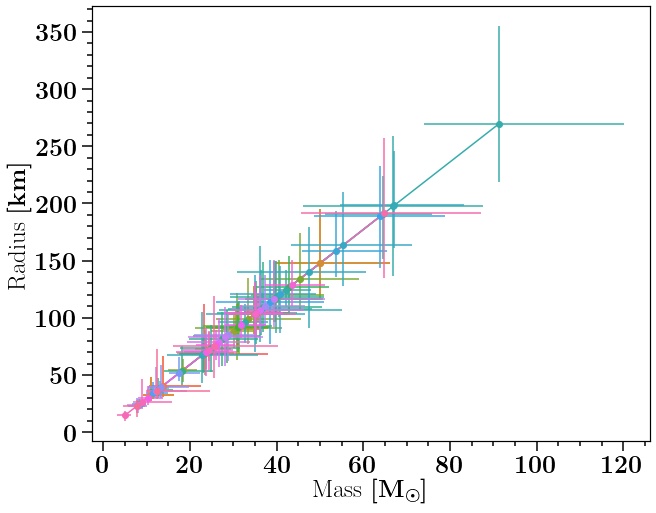

In [48]:
f, axe= plt.subplots(figsize=(10,8))
dfCSVname= '/Users/floorbroekgaarden/Projects/GitHub/GW-visulazation/GW_credible_intervals/'


allGWs = np.concatenate((BBHsGWTC1, BBHsGWTC2))
colors = sns.color_palette("husl", len(allGWs))

for ind_GW, GW in enumerate(allGWs):
    
           
    dfname = dfCSVname + 'CredibleIntervals_' + GW  + '.csv' 
    df = pd.read_csv(dfname, header=[0], index_col=[0], skiprows=[1])

    
    M1q0_05 = (df.iloc[0][0])# [Msun]
    M1q0_5 = (df.iloc[1][0])# [Msun]
    M1q0_95 = (df.iloc[2][0])# [Msun]
    R_s1 = schwarzschild_radius(mass_BH=M1q0_5*c.M_sun)

    # absolute 90% credible interval
    M1_err = np.asarray(np.transpose([[M1q0_5-M1q0_05, M1q0_95-M1q0_5]]))
    R_1_0_05 = R_s1-schwarzschild_radius(mass_BH=M1q0_05*c.M_sun)
    R_1_0_95 = schwarzschild_radius(mass_BH=M1q0_95*c.M_sun) - R_s1
    R_s1_err = np.asarray(np.transpose([[R_1_0_05.value, R_1_0_95.value]]))

    
    M2q0_05 = (df.iloc[0][1])# [Msun]
    M2q0_5 = (df.iloc[1][1])# [Msun]
    M2q0_95 = (df.iloc[2][1])# [Msun]
    R_s2 = schwarzschild_radius(mass_BH=M2q0_5*c.M_sun)
    
    # absolute 90% credible interval
    M2_err = np.asarray(np.transpose([[M2q0_5-M2q0_05, M2q0_95-M2q0_5]]))
    R_2_0_05 = R_s2-schwarzschild_radius(mass_BH=M2q0_05*c.M_sun)
    R_2_0_95 = schwarzschild_radius(mass_BH=M2q0_95*c.M_sun) - R_s2
    R_s2_err = np.asarray(np.transpose([[R_2_0_05.value, R_2_0_95.value]]))

    
    
    axe.errorbar(x=M1q0_5, y=R_s1.value, fmt='o',xerr=M1_err, yerr=R_s1_err, color=colors[ind_GW], zorder=11)
    axe.errorbar(x=M2q0_5, y=R_s2.value, fmt='o',xerr=M2_err, yerr=R_s2_err, color=colors[ind_GW], zorder=11)
    axe.plot([M1q0_5, M2q0_5], [R_s1.value, R_s2.value], color=colors[ind_GW], zorder=10)
    
    
xlabel = r'Mass  $[\rm{M}_{\odot}]$'
ylabel = r'Radius $[\rm{km}]$'
layoutAxes(axe, nameX=xlabel, nameY=ylabel)
plt.show()
# plt.errorbar